<a href="https://colab.research.google.com/github/ttcielott/geospatial_visualization_london_property/blob/main/London_Property_Market_Trend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Which London Borough shows the highest increase in freehold house price over the last 10 years?
(Room 1/ Room 2 / Room 3+)

2. Which London Borough shows the highest increase in leasehold house price over the last 10 years?
(Room 1/ Room 2 / Room 3+)

3. What is the median rental income of the houses each London Broughs? (Room 1/ Room 2/ Room 3+)

4. The supply and the demand of housing by London Borough


data source:
https://data.london.gov.uk/dataset/average-house-prices
<br>
https://data.london.gov.uk/dataset/statistical-gis-boundary-files-london


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
! pip install geopandas
import geopandas as gpd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 47.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 52.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 8.2 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.


In [2]:
# download the average house price of bourough in UK

re = requests.get("https://data.london.gov.uk/download/average-house-prices/f01b1cc7-6daa-4256-bd6c-94d8c83ee000/land-registry-house-prices-borough.xls")
open('avg_house_price.xls', 'wb').write(re.content)

949248

In [3]:
df = pd.read_excel('avg_house_price.xls', sheet_name = 'Median')
df.head()

,Code,Area,Year ending Dec 1995,Year ending Mar 1996,Year ending Jun 1996,Year ending Sep 1996,Year ending Dec 1996,Year ending Mar 1997,Year ending Jun 1997,Year ending Sep 1997,...,Year ending Sep 2015,Year ending Dec 2015,Year ending Mar 2016,Year ending Jun 2016,Year ending Sep 2016,Year ending Dec 2016,Year ending Mar 2017,Year ending Jun 2017,Year ending Sep 2017,Year ending Dec 2017
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E09000001,City of London,105000.0,112500.0,112375.0,121500.0,124250.0,126502.5,130000.0,130000.0,...,823750.0,799999.5,795000.0,799750.0,800000.0,831400.0,831400.0,812500.0,835000.0,835000.0
2,E09000002,Barking and Dagenham,49000.0,49995.0,50000.0,49995.0,49995.0,49950.0,50000.0,52000.0,...,235000.0,245500.0,255000.0,265000.0,277000.0,290000.0,300000.0,302000.0,302000.0,300000.0
3,E09000003,Barnet,85125.0,85000.0,85000.0,85500.0,87000.0,89500.0,91950.0,95000.0,...,440000.0,450000.0,455000.0,460000.0,470000.0,476500.0,482950.5,500000.0,512000.0,533500.0
4,E09000004,Bexley,62000.0,62000.0,63125.0,63500.0,65000.0,67000.0,68500.0,70000.0,...,271000.0,285000.0,295000.0,310000.0,322000.0,328000.0,330000.0,332000.0,336000.0,342500.0


In [4]:
df.dropna(how='all', inplace = True)

In [5]:
df2 = df.copy()
df2['growth_times'] = df2['Year ending Sep 2017']/ df2['Year ending Dec 1995']
df2['growth_times_last10yrs'] = df2['Year ending Sep 2017']/ df2['Year ending Dec 2008']
df2['growth_times_last5yrs'] = df2['Year ending Sep 2017']/ df2['Year ending Dec 2013']
df2[['Area', 'growth_times', 'growth_times_last10yrs', 'growth_times_last5yrs']].sort_values(['growth_times'], ascending = False).reset_index(drop = True)

,Area,growth_times,growth_times_last10yrs,growth_times_last5yrs
0,Hackney,8.551835,2.000000,1.413333
1,Newham,8.342246,1.659574,1.695652
2,Westminster,8.232066,2.121212,1.448276
3,Waltham Forest,8.045455,1.915584,1.669811
4,Haringey,7.958647,2.117000,1.557534
5,City of London,7.952381,2.287671,1.357724
6,Lambeth,7.795386,1.870893,1.469987
7,Wandsworth,7.696667,1.880186,1.415194
8,Lewisham,7.567568,1.850220,1.615385
9,Kensington and Chelsea,7.525326,1.854494,1.326531


In [6]:
# download the key GIS boundary files
re2 = requests.get('https://data.london.gov.uk/download/statistical-gis-boundary-files-london/9ba8c833-6370-4b11-abdc-314aa020d5e0/statistical-gis-boundaries-london.zip')
open('gis.zip', 'wb').write(re2.content)

28666674

In [7]:
!unzip gis.zip

Archive:  gis.zip
   creating: statistical-gis-boundaries-london/ESRI/
  inflating: statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.dbf  
  inflating: statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.GSS_CODE.atx  
  inflating: statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.NAME.atx  
  inflating: statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.prj  
  inflating: statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.sbn  
  inflating: statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.sbx  
  inflating: statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp  
  inflating: statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp.xml  
  inflating: statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shx  
  inflating: statistical-gis-boundaries-london/ESRI/London_Ward.BOROUGH.atx  
 extracting: statistical-gis-boundaries-london/ESR

In [8]:
! ls

avg_house_price.xls  gis.zip  sample_data  statistical-gis-boundaries-london


In [9]:
! cd statistical-gis-boundaries-london && ls && cd ESRI && ls

ESRI  Geography-licensing.pdf  MapInfo
London_Borough_Excluding_MHW.dbf
London_Borough_Excluding_MHW.GSS_CODE.atx
London_Borough_Excluding_MHW.NAME.atx
London_Borough_Excluding_MHW.prj
London_Borough_Excluding_MHW.sbn
London_Borough_Excluding_MHW.sbx
London_Borough_Excluding_MHW.shp
London_Borough_Excluding_MHW.shp.xml
London_Borough_Excluding_MHW.shx
London_Ward.BOROUGH.atx
London_Ward_CityMerged.BOROUGH.atx
London_Ward_CityMerged.cpg
London_Ward_CityMerged.dbf
London_Ward_CityMerged.GSS_CODE.atx
London_Ward_CityMerged.LB_GSS_CD.atx
London_Ward_CityMerged.prj
London_Ward_CityMerged.sbn
London_Ward_CityMerged.sbx
London_Ward_CityMerged.shp
London_Ward_CityMerged.shp.xml
London_Ward_CityMerged.shx
London_Ward.cpg
London_Ward.dbf
London_Ward.GSS_CODE.atx
London_Ward.LB_GSS_CD.atx
London_Ward.prj
London_Ward.sbn
London_Ward.sbx
London_Ward.shp
London_Ward.shp.xml
London_Ward.shx
LSOA_2004_London_Low_Resolution.dbf
LSOA_2004_London_Low_Resolution.prj
LSOA_2004_London_Low_Resolution.shp
LSO

In [10]:
# read shapefile with geopandas into GeoDatafrmae
gpd_df = gpd.read_file('statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp')
gpd_df.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,NaN,NaN,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Croydon,E09000008,8649.441,0.000,F,NaN,NaN,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,Bromley,E09000006,15013.487,0.000,F,NaN,NaN,"POLYGON ((540373.600 157530.400, 540361.200 15..."
3,Hounslow,E09000018,5658.541,60.755,F,NaN,NaN,"POLYGON ((521975.800 178100.000, 521967.700 17..."
4,Ealing,E09000009,5554.428,0.000,F,NaN,NaN,"POLYGON ((510253.500 182881.600, 510249.900 18..."


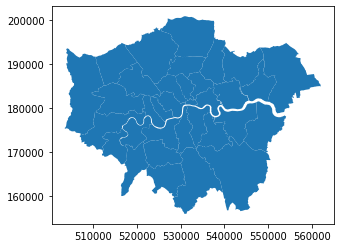

In [11]:
# plot GeoDataFrame
gpd_df.plot()
plt.show()

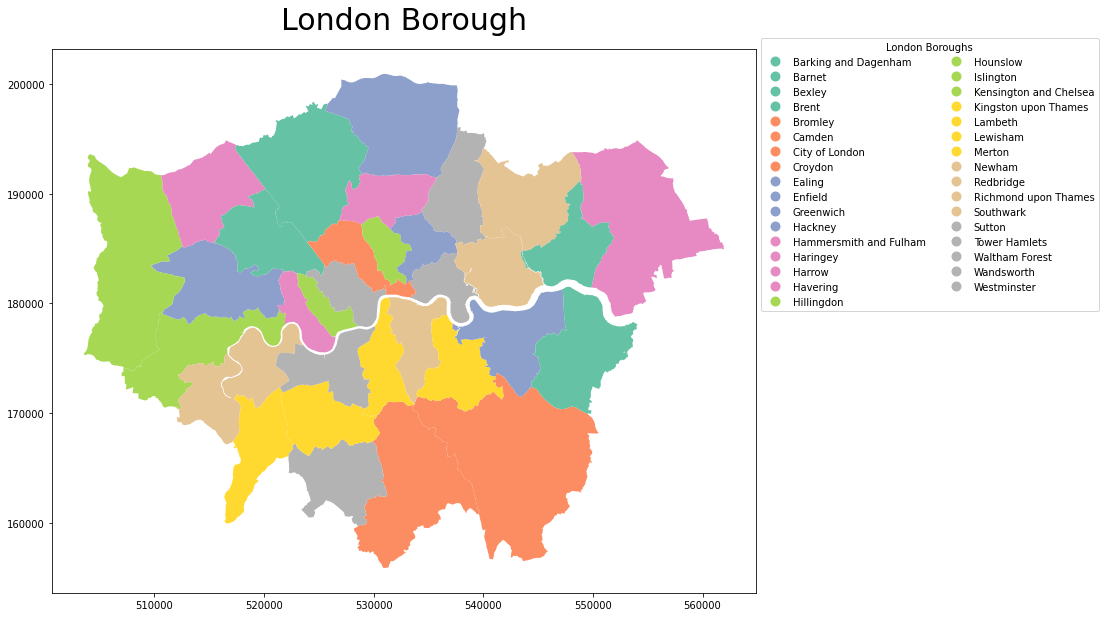

In [12]:
# plot GeoDataFrame with coloring of each boroughs
# plot shapefile polygons

# set legend display
leg_kwds = {'title': 'London Boroughs',
            'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 
            'ncol': 2}
gpd_df.plot(column = 'NAME', legend = True, figsize = (20, 10), cmap = 'Set2', legend_kwds = leg_kwds)
plt.title('London Borough', fontdict = {'fontsize': 30}, pad = 20)
plt.show()

In [13]:
# view ward-base shapefile as well

gpd_ward = gpd.read_file('statistical-gis-boundaries-london/ESRI/London_Ward_CityMerged.shp')

gpd_ward.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,LB_GSS_CD,BOROUGH,POLY_ID,geometry
0,Chessington South,E05000405,755.173,0.0,E09000021,Kingston upon Thames,50840,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Tolworth and Hook Rise,E05000414,259.464,0.0,E09000021,Kingston upon Thames,117160,"POLYGON ((517829.600 165447.100, 517837.100 16..."
2,Berrylands,E05000401,145.390,0.0,E09000021,Kingston upon Thames,50449,"POLYGON ((518107.500 167303.400, 518114.300 16..."
3,Alexandra,E05000400,268.506,0.0,E09000021,Kingston upon Thames,50456,"POLYGON ((520480.000 166909.800, 520490.700 16..."
4,Beverley,E05000402,187.821,0.0,E09000021,Kingston upon Thames,117161,"POLYGON ((522071.000 168144.900, 522063.900 16..."


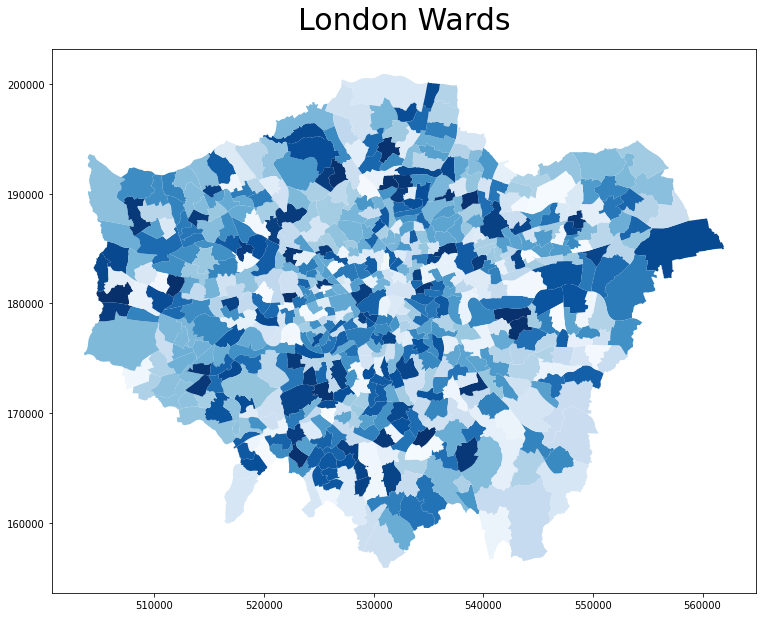

In [14]:
# plot GeoDataFrame 
# plot shapefile polygons
gpd_ward.plot(column = 'NAME', cmap = 'Blues', figsize= (20, 10))
plt.title('London Wards' , fontdict = {'fontsize': 30}, pad = 20)
plt.show()

In [15]:
# get location dataset
re3 = requests.get('https://data.london.gov.uk/download/london-schools-atlas/57046151-39a0-45d9-8dc0-27ea7fd02de8/all_schools_xy_2016.csv')
open('schools.csv', 'wb').write(re3.content)

938049

In [16]:
schools = pd.read_csv('schools.csv')
schools.head()

,OBJECTID,URN,SCHOOL_NAM,TYPE,PHASE,ADDRESS,TOWN,POSTCODE,STATUS,GENDER,...,LA_NAME,WEBLINK,AGE,map_icon,NEW_URN,OLD_URN,map_icon_l,Primary,x,y
0,1,135155,Ayesha Siddiqa Girls School,Other Independent School,Not applicable,165-169 The Broadway,Southall,UB1 1LR,Open,Girls,...,Ealing,,19-Nov,,,,2,0,-0.378496,51.507500
1,2,140492,Beis Medrash Elyon,Other Independent School,Not applicable,233 West Hendon Broadway,London,NW9 7DG,Open,Boys,...,Barnet,,16-Nov,,,,2,0,-0.241628,51.578999
2,3,141411,Big Creative Independent School,Other Independent School,Not applicable,Silver Birch House,Walthamstow,E17 5SD,Open,Mixed,...,Waltham Forest,,15 - 16,,,,2,0,-0.042590,51.594002
3,4,142336,Wetherby Senior School,Other Independent School,Not applicable,100 Marylebone Lane,London,W1U 2QB,Open,Boys,...,Westminster,,16-Nov,,,,2,0,-0.150409,51.517601
4,5,100042,St Mary's Kilburn Church of England Primary Sc...,Voluntary Aided School,Primary,Quex Road,London,NW6 4PG,Open,Mixed,...,Camden,http://www.stmarykilburn.camden.sch.uk/,11-Mar,VOLUNTARY,,,2,1,-0.193367,51.540402


In [17]:
schools.columns

Index(['OBJECTID', 'URN', 'SCHOOL_NAM', 'TYPE', 'PHASE', 'ADDRESS', 'TOWN',
       'POSTCODE', 'STATUS', 'GENDER', 'EASTING', 'NORTHING', 'WARD_NAME',
       'LSOA_NAME', 'LA_NAME', 'WEBLINK', 'AGE', 'map_icon', 'NEW_URN',
       'OLD_URN', 'map_icon_l', 'Primary', 'x', 'y'],
      dtype='object')

In [18]:
schools.PHASE.unique()

array(['Not applicable', 'Primary', 'Secondary', 'All Through',
       'Middle Deemed Secondary'], dtype=object)

In [19]:
schools.STATUS.unique()

array(['Open', 'Closed', 'Open, but proposed to close'], dtype=object)

**Creating the function that you can map the coordinates** 
by attribute such as type, phase, and gender.

In [20]:
def filter_by(df, column_name, filter_content:list):
  # filter dataframe by condition
  filtered_df= df[df[column_name].isin(filter_content)]
  
  # plot location
  gpd_df.plot(column = 'NAME')
  plt.scatter(x= filtered_df.EASTING, y = filtered_df.NORTHING, c = 'black', edgecolors = 'white')
  plt.show()

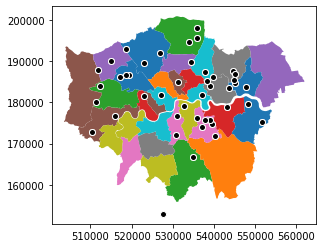

In [21]:
filter_by(schools, 'PHASE', ['All Through'])

## Projections
<br>
Map projections are necessary for representing the earth in 2-dimensional space.
<br><br>
* The most common projection is Mercator
* A variation of Mercator is WGS84 (which is short for World Geodetic System 1984)
* WGS84 is used in most mapping apps and the Global Positioning System, or GPS.
<br>

!['xkcd illustration on map projections'](http://i.imgur.com/1ev1X.png)

**Coordinate Reference System (CRS)**
<br>
Setting a CRS for GeoDataFrame tells geopandas how to interpret the longitude and latitude coordinates and distance unit.
<br>
* Most common CRS : EPSG:4326 and EPSG:3857, both use WGS84 system.
>* EPSG:4326 used by Google Earth, unit: Decimal degree
>* EPSG:3857 used by Google Maps, Bing Maps, Open Street Maps, unit: meters
>* EPSG stands for European Petroleum Survey Group, the entity developed these systems.

In [22]:
# view the current CRS
gpd_df.crs

<Derived Projected CRS: PROJCS["OSGB36 / British National Grid",GEOGCS["OS ...>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [23]:
# conver OSGB36 to WGS84 system
gpd_df_W = gpd_df.to_crs(epsg = 4326)
gpd_df_W.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## GeoDataFrame & Geometry
* Geometry is a special data structure.
* It is a required component for GeoDataFrames.
* We can create geometry column using shapely python package.

In [24]:
# create a point geometry column
from shapely.geometry import Point
schools['geometry'] = schools.apply(lambda x: Point((x.x, x.y)), axis = 1)
schools.geometry

0        POINT (-0.378496 51.5074997)
1        POINT (-0.241628 51.5789986)
2       POINT (-0.0425897 51.5940018)
3         POINT (-0.150409 51.517601)
4        POINT (-0.193367 51.5404015)
                    ...              
3884     POINT (0.0178413 51.5339012)
3885      POINT (0.117722 51.3699989)
3886      POINT (0.117722 51.3699989)
3887      POINT (0.006027 51.5600014)
3888     POINT (-0.080438 51.3843002)
Name: geometry, Length: 3889, dtype: object

## Creating GeoDataFrame from DataFrame
<br>
We can use GeoDataFrame constructor.

In [25]:
# create GeoDataFrame from DataFrame, schools
schools_crs = 'epsg:4326'
schools_geo = gpd.GeoDataFrame(schools,
                              crs = schools_crs,
                              geometry = schools.geometry)

In [26]:
# check if the GeoDataFrame is created
type(schools_geo)

geopandas.geodataframe.GeoDataFrame

In [27]:
schools_geo.head()

,OBJECTID,URN,SCHOOL_NAM,TYPE,PHASE,ADDRESS,TOWN,POSTCODE,STATUS,GENDER,...,WEBLINK,AGE,map_icon,NEW_URN,OLD_URN,map_icon_l,Primary,x,y,geometry
0,1,135155,Ayesha Siddiqa Girls School,Other Independent School,Not applicable,165-169 The Broadway,Southall,UB1 1LR,Open,Girls,...,,19-Nov,,,,2,0,-0.378496,51.507500,POINT (-0.37850 51.50750)
1,2,140492,Beis Medrash Elyon,Other Independent School,Not applicable,233 West Hendon Broadway,London,NW9 7DG,Open,Boys,...,,16-Nov,,,,2,0,-0.241628,51.578999,POINT (-0.24163 51.57900)
2,3,141411,Big Creative Independent School,Other Independent School,Not applicable,Silver Birch House,Walthamstow,E17 5SD,Open,Mixed,...,,15 - 16,,,,2,0,-0.042590,51.594002,POINT (-0.04259 51.59400)
3,4,142336,Wetherby Senior School,Other Independent School,Not applicable,100 Marylebone Lane,London,W1U 2QB,Open,Boys,...,,16-Nov,,,,2,0,-0.150409,51.517601,POINT (-0.15041 51.51760)
4,5,100042,St Mary's Kilburn Church of England Primary Sc...,Voluntary Aided School,Primary,Quex Road,London,NW6 4PG,Open,Mixed,...,http://www.stmarykilburn.camden.sch.uk/,11-Mar,VOLUNTARY,,,2,1,-0.193367,51.540402,POINT (-0.19337 51.54040)


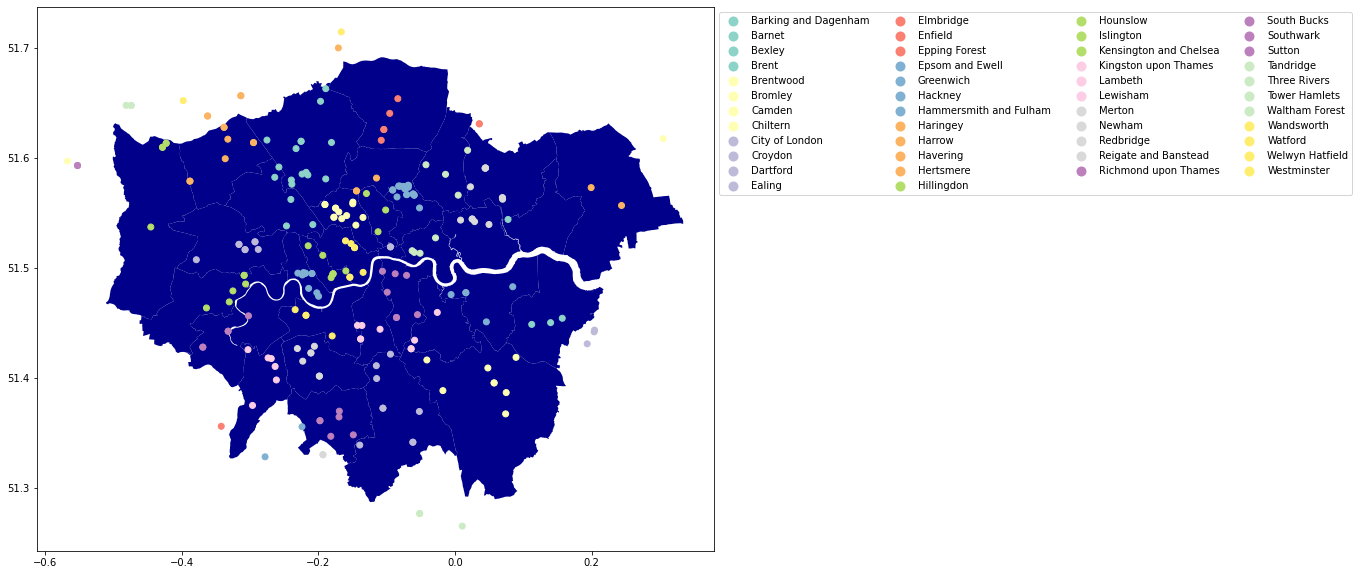

In [28]:
# plot london boroughs as ax
ax = gpd_df_W.plot(color = 'darkblue', figsize = (20,10))

# plot the girls schools from GeoDataFrame, school_geo
schools_geo[schools_geo.GENDER == 'Girls'].plot(ax = ax, column = 'LA_NAME', cmap = 'Set3', legend = True, legend_kwds = {'bbox_to_anchor': (1, 1), 'ncol': 4})

We can see that some schools are not located within London Boroughs. 
<br> How can we make it display only schoools located within London Boroughs? 

## Joining GeoDataFrames

In [29]:
# with sjoin, let's filter schools only within London Boroughs
schools_london_b = gpd.sjoin(schools_geo, gpd_df_W, predicate = 'within')
schools_geo.shape,  schools_london_b.shape

((3889, 25), (3372, 33))

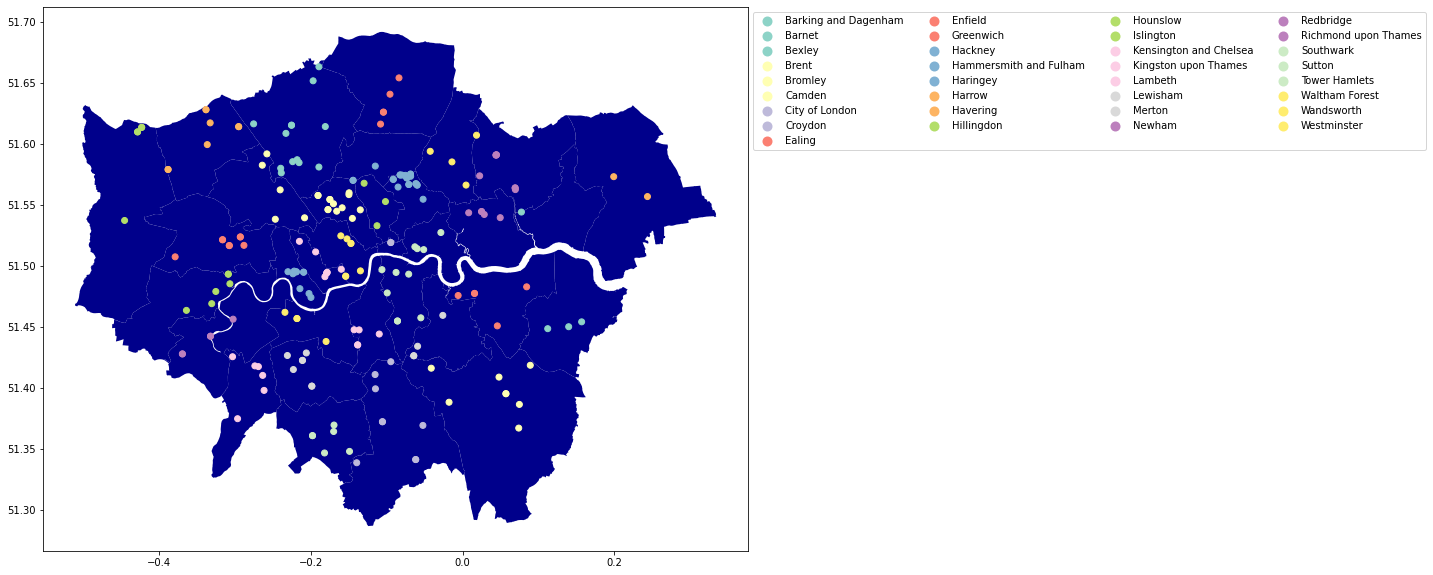

In [30]:
# plot girls school located within London Boroughs
ax = gpd_df_W.plot(color = 'darkblue', figsize = (20, 10))
schools_london_b[schools_london_b.GENDER == 'Girls'].plot(ax = ax, column = 'LA_NAME', 
                                                          cmap = 'Set3', legend = True, 
                                                          legend_kwds = {'bbox_to_anchor': (1, 1), 'ncol': 4})

## GeoSeries

### Area of Polygon
**How to Get an Area from GeoDataFrame**
We can get the value of area from **GeoSeries**, which is data type of the geometry column of GeoDataFrame. 

GeoSeries shows the useful atrributes and methods that Geopandas inherits from the Shapely package. 

One of them is an area attribute.

In [31]:
# see the type of the geometry column
type(gpd_df_W.geometry)

geopandas.geoseries.GeoSeries

As you can see, it is GeoSeries.

In [32]:
# check the current coordinate reference system
gpd_df_W.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The current CRS, **EPSG:4326** uses **decimal degrees** for distance, so the area units here are decimal degrees squared.

*About Decimal Degrees : a notation for expressing latitude and longitude geographic coordinates as decimal fractions of a degree.

In [33]:
gpd_df_W.geometry.area

<ipython-input-33-7bc6113675ac>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gpd_df_W.geometry.area


0     0.004813
1     0.011164
2     0.019384
3     0.007237
4     0.007196
5     0.014565
6     0.014996
7     0.006548
8     0.005605
9     0.011261
10    0.003468
11    0.003735
12    0.004546
13    0.006125
14    0.007836
15    0.010678
16    0.005035
17    0.007318
18    0.005660
19    0.007417
20    0.004862
21    0.004432
22    0.002123
23    0.001570
24    0.002783
25    0.002824
26    0.002562
27    0.001926
28    0.002469
29    0.003840
30    0.004690
31    0.004679
32    0.000376
dtype: float64

Let's find the area in a way that is a little more comprehensible:
<br> 

**$km^{2}$** (Kilometer squared)

In [34]:
# change CRS to one that uses meters for distance
# EPSG: 3857 uses meters for distance
gpd_df_3857 = gpd_df_W.to_crs(epsg = 3857)

EPSG:4326 | EPSG:3857
- | -
coordinate system <br> on curved surface |  coordinate system <br> on flat surface
decimal degrees | meters


In [35]:
# get the area of London Boroughs in kilometers squared
area_kms = gpd_df_3857.area / 10**6

# add the column of the area size
gpd_df_3857['area_km2'] = area_kms

# see the area with the name of London Boroughs
gpd_df_3857[['NAME', 'area_km2']].sort_values(by = 'area_km2', ascending = False)

,NAME,area_km2
2,Bromley,384.781741
6,Hillingdon,298.793466
5,Havering,290.343940
9,Barnet,224.736211
1,Croydon,221.531248
15,Enfield,213.269136
14,Bexley,155.842672
19,Richmond upon Thames,147.464634
17,Redbridge,145.950187
3,Hounslow,143.962873


### Centroid

Centroid returns the points at center of a geometry


In [36]:
# let's get the centroid of City of London
COL_ctr = gpd_df_3857[gpd_df_3857.NAME == 'City of London'].geometry.centroid

In [37]:
# let's get the polygon of City of London
COL_area = gpd_df_3857[gpd_df_3857.NAME == 'City of London'].geometry

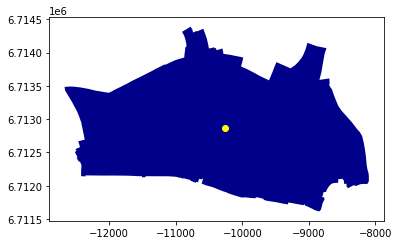

In [38]:
# plot together
ax = COL_area.plot(color = 'darkblue')
COL_ctr.plot(ax = ax, color = 'yellow')
plt.show()

In [39]:
# let's get the centroid of all London Boroughs
# and add the new column of the centroid
gpd_df_3857['center'] = gpd_df_3857.geometry.centroid
gpd_df_3857['center'] 

0     POINT (-31936.823 6690202.773)
1      POINT (-9701.729 6684396.689)
2       POINT (5734.954 6687368.890)
3     POINT (-40866.363 6704568.600)
4     POINT (-36850.079 6714240.703)
5      POINT (24613.188 6721748.052)
6     POINT (-49610.141 6717658.209)
7     POINT (-37989.202 6727715.029)
8     POINT (-29814.157 6720698.609)
9     POINT (-23378.952 6730997.699)
10    POINT (-13166.702 6701837.678)
11     POINT (-8304.597 6705421.268)
12     POINT (-2254.954 6700943.938)
13      POINT (6261.276 6705359.966)
14     POINT (15624.736 6702861.589)
15     POINT (-9715.388 6737268.186)
16     POINT (-1406.793 6727055.034)
17      POINT (8445.521 6725555.691)
18    POINT (-19767.465 6685596.485)
19    POINT (-34838.376 6699887.850)
20    POINT (-21958.285 6694133.077)
21    POINT (-20754.799 6701526.017)
22    POINT (-24634.500 6709497.473)
23    POINT (-21459.654 6710508.494)
24    POINT (-17956.665 6712705.973)
25    POINT (-17524.778 6718520.851)
26     POINT (-3961.785 6713291.211)
2

### Distance

The distance method of a GeoSeries finds the minimum distance from the geometry it is called on to the geometry passed in as an argument labeled 'other'

In [40]:
next(gpd_df_3857.iterrows())[1]

NAME                                       Kingston upon Thames
GSS_CODE                                              E09000021
HECTARES                                               3726.117
NONLD_AREA                                                  0.0
ONS_INNER                                                     F
SUB_2009                                                    NaN
SUB_2006                                                    NaN
geometry      POLYGON ((-36811.020333058405 6679699.61057803...
area_km2                                              95.577493
center             POINT (-31936.82294775514 6690202.773216417)
Name: 0, dtype: object

In [41]:
gpd_df_3857.loc[0,'center'].distance(other = COL_ctr)

32    31366.449512
dtype: float64

**The Distance between the Center of City of London Borough and the Center of the Other Boroughs**

In [42]:
# let's get the distance 
# between the center of City of London and the center of the other London Boroughs
distances = []
for row in gpd_df_3857.iterrows():
  vals = row[1]
  distances.append(vals['center'].distance(other = COL_ctr))

gpd_df_3857['distance_from_COL_center'] = distances

In [43]:
# convert the data type as float 
# and get the distance in kilometers
gpd_df_3857['distance_from_COL_center'] = gpd_df_3857['distance_from_COL_center'].astype('float') / 10**3

# view the boroughs sorted by distance from the center of City of London Borough
gpd_df_3857[['NAME', 'distance_from_COL_center']].sort_values('distance_from_COL_center').reset_index(drop = True)

,NAME,distance_from_COL_center
0,City of London,0.000000
1,Tower Hamlets,6.312487
2,Islington,6.348703
3,Hackney,7.428127
4,Westminster,7.698024
5,Southwark,7.705230
6,Camden,9.200846
7,Lambeth,11.412682
8,Kensington and Chelsea,11.446299
9,Haringey,13.629027


## Add Street Map with Folium

**What is Folium?**
* python package
* interactive map
* built upon Leaflet.js

**Folium Map Constructor**
* location = [latitude, longtitude] 
> + The coordinate pair that comes in the center of the map in location argument. 
> + Unlike GeoSeries data, Folium take latitude first. 
> + The Coordinate Reference System to use for this coordinate pair is EPSG:4326 althrough folium map constructor's default crs is EPSG: 3857.
* zoom_start = 10
> The higher the number, the closer your map will zoom into the starting coordinate pair.

In [44]:
 import folium

In [45]:
gpd_df_W[gpd_df_W.NAME == 'Hackney'].geometry.to_crs(epsg=3857).centroid

28    POINT (-7048.358 6719571.839)
dtype: geometry

In [46]:
# pass the starting coordinate pair as 'location' to the folium Map constructor

# I will pick the center of Hackney Borough as the coordinate pair
# location value should be EPSG:4326, so we will use gpd_df_W geodataframe

# folium takes latitude first

# get the latitude of the center
hkn_lat = gpd_df_W.loc[gpd_df_W.NAME == 'Hackney'].to_crs(epsg = 3857).geometry.centroid.to_crs(epsg = 4326).y
# get the longtitude of the center
hkn_lng = gpd_df_W.loc[gpd_df_W.NAME == 'Hackney'].to_crs(epsg = 3857).geometry.centroid.to_crs(epsg = 4326).x

# place the latitude first and then longtitude
hackney_ctr = [hkn_lat, hkn_lng]


# pass the coordinate par as location
hackney_map = folium.Map(location = hackney_ctr, zoom_start = 15, width = '50%', height = '50%')

# display the map
display(hackney_map)


In [47]:
# create a folium map centered on Westminster Abbey
westminster_abbey_coord = [51.49947215302145,  -0.12732629600493217]

wmst_abb_map = folium.Map(location = westminster_abbey_coord, zoom_start = 13, width = '50%', height = '50%')

display(wmst_abb_map)

### Overlay the different outline

In [48]:
st_james_ward = gpd_ward[gpd_ward.NAME.str.contains("St. James's")].geometry

title_html = '''
             <h3 align="left" style="font-size:20px"><b>St.Jame's ward in Westminster Borough</b></h3>
             '''
wmst_abb_map.get_root().html.add_child(folium.Element(title_html))


# add the outline of St.Jame's Ward
folium.GeoJson(st_james_ward).add_to(wmst_abb_map)

# show the map
display(wmst_abb_map)


### Add Markers

In [49]:
# download train station coordinate data
re = requests.get('https://www.doogal.co.uk/LondonStationsKML/?output=json')
open('train_dataset.json', 'wb').write(re.content)

279555

In [50]:
# load the data
train_station_data = gpd.read_file('train_dataset.json')
train_station_data.head()

,link,name,marker-color,zone,postcode,geometry
0,https://www.doogal.co.uk/StationMap?station=Ab...,Abbey Road,yellow,3,E15 3NB,POINT (0.00372 51.53195)
1,https://www.doogal.co.uk/StationMap?station=Ab...,Abbey Wood,GreenYellow,4,SE2 9RH,POINT (0.12027 51.49078)
2,https://www.doogal.co.uk/StationMap?station=Ac...,Acton Central,orange,2,W3 6BH,POINT (-0.26343 51.50876)
3,https://www.doogal.co.uk/StationMap?station=Ac...,Acton Main Line,yellow,3,W3 9EH,POINT (-0.26769 51.51689)
4,https://www.doogal.co.uk/StationMap?station=Ac...,Acton Town,yellow,3,W3 8HN,POINT (-0.28030 51.50307)


In [51]:
train_station_data.geometry[0].x

0.0037233710983363487

In [52]:
london_map = folium.Map(location = [51.50226334233467, -0.1391847696204745], 
                        zoom_start = 10, width = '50%', height = '50%')

for row in train_station_data.iterrows():
  value = row[1]
  station_name = value['name']
  station_coord = [value['geometry'].y, value['geometry'].x]

  # the string assigned to a popup renders as HTML, you can add HTML tags to style it.
  popup = popup = '<strong>' + station_name + '</strong>'
  marker = folium.Marker(location = station_coord, popup = popup)
  marker.add_to(london_map)

display(london_map)

## Choropleth

In [53]:
# join two GeoDataFrames, train station data and london borough data
# we will know which borough each stations are located in
boroughs_stations = gpd.sjoin(train_station_data ,gpd_df_W, how = 'right', predicate = 'within')
boroughs_stations.head()

,index_left,link,name,marker-color,zone,postcode,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,119,https://www.doogal.co.uk/StationMap?station=Ch...,Chessington South,cyan,6,KT9 2DD,Kingston upon Thames,E09000021,3726.117,0.0,F,NaN,NaN,"POLYGON ((-0.33068 51.32901, -0.33059 51.32909..."
0,118,https://www.doogal.co.uk/StationMap?station=Ch...,Chessington North,cyan,6,KT9 2RT,Kingston upon Thames,E09000021,3726.117,0.0,F,NaN,NaN,"POLYGON ((-0.33068 51.32901, -0.33059 51.32909..."
0,558,https://www.doogal.co.uk/StationMap?station=To...,Tolworth,green,5,KT5 9NU,Kingston upon Thames,E09000021,3726.117,0.0,F,NaN,NaN,"POLYGON ((-0.33068 51.32901, -0.33059 51.32909..."
0,653,https://www.doogal.co.uk/StationMap?station=Wo...,Worcester Park,GreenYellow,4,KT4 7ND,Kingston upon Thames,E09000021,3726.117,0.0,F,NaN,NaN,"POLYGON ((-0.33068 51.32901, -0.33059 51.32909..."
0,353,https://www.doogal.co.uk/StationMap?station=Ma...,Malden Manor,GreenYellow,4,KT3 5PN,Kingston upon Thames,E09000021,3726.117,0.0,F,NaN,NaN,"POLYGON ((-0.33068 51.32901, -0.33059 51.32909..."


In [54]:
# replace the column name to avoid confusion
boroughs_stations.rename(columns = {'name': 'station', 'NAME': 'borough'}, inplace = True)
boroughs_stations.head()

,index_left,link,station,marker-color,zone,postcode,borough,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,119,https://www.doogal.co.uk/StationMap?station=Ch...,Chessington South,cyan,6,KT9 2DD,Kingston upon Thames,E09000021,3726.117,0.0,F,NaN,NaN,"POLYGON ((-0.33068 51.32901, -0.33059 51.32909..."
0,118,https://www.doogal.co.uk/StationMap?station=Ch...,Chessington North,cyan,6,KT9 2RT,Kingston upon Thames,E09000021,3726.117,0.0,F,NaN,NaN,"POLYGON ((-0.33068 51.32901, -0.33059 51.32909..."
0,558,https://www.doogal.co.uk/StationMap?station=To...,Tolworth,green,5,KT5 9NU,Kingston upon Thames,E09000021,3726.117,0.0,F,NaN,NaN,"POLYGON ((-0.33068 51.32901, -0.33059 51.32909..."
0,653,https://www.doogal.co.uk/StationMap?station=Wo...,Worcester Park,GreenYellow,4,KT4 7ND,Kingston upon Thames,E09000021,3726.117,0.0,F,NaN,NaN,"POLYGON ((-0.33068 51.32901, -0.33059 51.32909..."
0,353,https://www.doogal.co.uk/StationMap?station=Ma...,Malden Manor,GreenYellow,4,KT3 5PN,Kingston upon Thames,E09000021,3726.117,0.0,F,NaN,NaN,"POLYGON ((-0.33068 51.32901, -0.33059 51.32909..."


In [55]:
# count the number of station for each borough
# size() returns Series while count() returns DataFrame
stations_count = boroughs_stations.groupby(['borough'])['station'].size()
stations_count

borough
Barking and Dagenham       7
Barnet                    18
Bexley                    10
Brent                     26
Bromley                   28
Camden                    27
City of London            13
Croydon                   39
Ealing                    24
Enfield                   23
Greenwich                 17
Hackney                   15
Hammersmith and Fulham    16
Haringey                  15
Harrow                    13
Havering                   9
Hillingdon                17
Hounslow                  15
Islington                 16
Kensington and Chelsea    12
Kingston upon Thames      10
Lambeth                   20
Lewisham                  21
Merton                    21
Newham                    28
Redbridge                 15
Richmond upon Thames      14
Southwark                 18
Sutton                    11
Tower Hamlets             28
Waltham Forest            12
Wandsworth                14
Westminster               30
Name: station, dtype: int64

In [56]:
# convert station_counts to a DataFrame
stations_df = stations_count.to_frame()
stations_df.reset_index(inplace = True)
stations_df.rename(columns = {'station': 'num_stations'}, inplace = True)
stations_df.head()

,borough,num_stations
0,Barking and Dagenham,7
1,Barnet,18
2,Bexley,10
3,Brent,26
4,Bromley,28


In [57]:
# convert CRS
boroughs_stations.to_crs(epsg=3857, inplace = True)

In [58]:
# create area column in boroughs_stations geodataframe
boroughs_stations['borough_area'] = boroughs_stations.geometry.area

# make the area values in kilometers squared
boroughs_stations['borough_area'] = boroughs_stations.borough_area / 10**6

In [59]:
# merge boroughs_stations and stations_df
# always put GeoDataFrame first in the merge argument when you want to creat a map with the result
# when the dataframe, not GeoDataFrame comes first, the result is also dataframe not GeoDataFrame
# so you can't create a map with it.
boroughs_stations2 = pd.merge(boroughs_stations, stations_df, on = 'borough')
boroughs_stations2.head()

,index_left,link,station,marker-color,zone,postcode,borough,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,borough_area,num_stations
0,119,https://www.doogal.co.uk/StationMap?station=Ch...,Chessington South,cyan,6,KT9 2DD,Kingston upon Thames,E09000021,3726.117,0.0,F,NaN,NaN,"POLYGON ((-36811.020 6679699.611, -36801.601 6...",95.577493,10
1,118,https://www.doogal.co.uk/StationMap?station=Ch...,Chessington North,cyan,6,KT9 2RT,Kingston upon Thames,E09000021,3726.117,0.0,F,NaN,NaN,"POLYGON ((-36811.020 6679699.611, -36801.601 6...",95.577493,10
2,558,https://www.doogal.co.uk/StationMap?station=To...,Tolworth,green,5,KT5 9NU,Kingston upon Thames,E09000021,3726.117,0.0,F,NaN,NaN,"POLYGON ((-36811.020 6679699.611, -36801.601 6...",95.577493,10
3,653,https://www.doogal.co.uk/StationMap?station=Wo...,Worcester Park,GreenYellow,4,KT4 7ND,Kingston upon Thames,E09000021,3726.117,0.0,F,NaN,NaN,"POLYGON ((-36811.020 6679699.611, -36801.601 6...",95.577493,10
4,353,https://www.doogal.co.uk/StationMap?station=Ma...,Malden Manor,GreenYellow,4,KT3 5PN,Kingston upon Thames,E09000021,3726.117,0.0,F,NaN,NaN,"POLYGON ((-36811.020 6679699.611, -36801.601 6...",95.577493,10


In [60]:
# create a station_density column in boroughs_stations2
boroughs_stations2['station_density'] = boroughs_stations2.apply(lambda row: row.num_stations / row.borough_area, axis =1)

In [61]:
# convert CRS back to EPSG:4326, so x and y axis are longitude and latitude
boroughs_stations2.to_crs(epsg=4326, inplace = True)

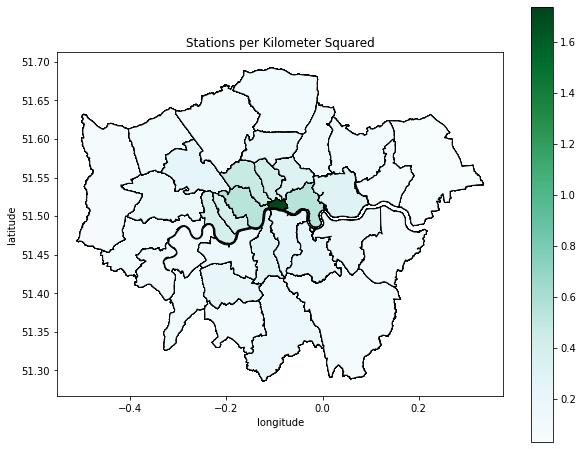

In [62]:
# plot the station density using GeoDataFrame.plot()
boroughs_stations2.plot(column = 'station_density', legend = True, 
                        cmap = 'BuGn', edgecolor = 'black', figsize = (10,8))
plt.title('Stations per Kilometer Squared')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

Train stations are most densly placed in the borough, City of London and the density there is greather than one station for every 1 kilometer squared.

In [63]:
# display the price increase rate of median housing price on choropleth
boroughs_stations2 = pd.merge(boroughs_stations2, df2[['Area', 'growth_times', 'growth_times_last10yrs', 'growth_times_last5yrs']], left_on = 'borough', right_on = 'Area',)

In [64]:
boroughs_stations2.columns

Index(['index_left', 'link', 'station', 'marker-color', 'zone', 'postcode',
       'borough', 'GSS_CODE', 'HECTARES', 'NONLD_AREA', 'ONS_INNER',
       'SUB_2009', 'SUB_2006', 'geometry', 'borough_area', 'num_stations',
       'station_density', 'Area', 'growth_times', 'growth_times_last10yrs',
       'growth_times_last5yrs'],
      dtype='object')

In [65]:
assert (boroughs_stations2.borough == boroughs_stations2.Area).unique() == True

In [66]:
boroughs_stations2.drop(columns = 'Area', inplace = True)

In [67]:
type(boroughs_stations2)

geopandas.geodataframe.GeoDataFrame

## Choropleth with Folium

In [88]:
gpd_df_W.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [68]:
increase_data = df2[['Area', 'growth_times', 'growth_times_last10yrs', 'growth_times_last5yrs']]

In [90]:
boroughs_stations2.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [98]:
gpd_df_W.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,NaN,NaN,"POLYGON ((-0.33068 51.32901, -0.33059 51.32909..."
1,Croydon,E09000008,8649.441,0.000,F,NaN,NaN,"POLYGON ((-0.06402 51.31864, -0.06408 51.31861..."
2,Bromley,E09000006,15013.487,0.000,F,NaN,NaN,"POLYGON ((0.01213 51.29960, 0.01196 51.29980, ..."
3,Hounslow,E09000018,5658.541,60.755,F,NaN,NaN,"POLYGON ((-0.24456 51.48870, -0.24468 51.48868..."
4,Ealing,E09000009,5554.428,0.000,F,NaN,NaN,"POLYGON ((-0.41183 51.53408, -0.41188 51.53412..."


In [107]:
london_map = folium.Map(location = [51.50226334233467, -0.1391847696204745], 
                        width = '50%', height = '70%',
                        zoom_start = 10)

folium.Choropleth(geo_data = gpd_df_W, 
                  name = 'geometry', 
                  data = increase_data, 
                  columns = ['Area', 'growth_times'],
                  key_on = 'feature.properties.NAME',
                  fill_color = 'OrRd',
                  fill_opacity = 0.6,
                  line_opacity = 1,
                  legend_name = 'multiple', ).add_to(london_map)

# Create LayerControl and add it to the map            
folium.LayerControl().add_to(london_map)


# ad marker 

# Display the map
display(london_map)

In [85]:
london_map